## Optimizing Dataframes and Processing in Chunks

In this project, we'll practice working with chunked dataframes and optimizing a dataframe's memory usage. For this purpose, we'll be working with financial lending data from [Lending Club](https://www.lendingclub.com/), a marketplace for personal loans that matches borrowers with investors.

The Lending Club's website lists approved loans. Qualified investors can view the borrower's credit score, the purpose of the loan, and other details in the loan applications. Once a lender is ready to back a loan, it selects the amount of money it wants to fund. When the loan amount the borrower requested is fully funded, the borrower receives the money, minus the origination fee that Lending Club charges.

We'll be working with a dataset of loans approved from 2007 to 2011. The total amount of memory consumed by the entire data set is about __67 megabytes__. For this project, we'll consider that we only have __10 megabytes__ of memory available, so we'll need to work around this statement.

### Step 1: Exploring the data in chunks

We'll start by exploring the data set with a first look to the data contained in it. After that, we'll evaluate the total memory usage for a certain number of rows.

In [1]:
import pandas as pd
pd.options.display.max_columns = 99

In [2]:
loans = pd.read_csv("loans_2007.csv", nrows=5)
loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [3]:
loans = pd.read_csv("loans_2007.csv", nrows=1000)
print('Total memory usage in MB: ', loans.memory_usage(deep=True).sum() / (1024*1024)) # To MB

Total memory usage in MB:  1.5502548217773438


As our total available memory is about __10 megabytes__, to stay on a conservative side, we'll try to adjust each chunk of data below a 50% of the total available memory, about __5 megabytes__. Taking this into account, we can see that the maximum number of rows to process in each of the chunks will be about 3 times the value obtained previously.

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.88085461, 1.28246479, 1.68407497, 2.08568516, 2.48729534,
        2.88890553, 3.29051571, 3.69212589, 4.09373608, 4.49534626,
        4.89695644]),
 <a list of 10 Patch objects>)

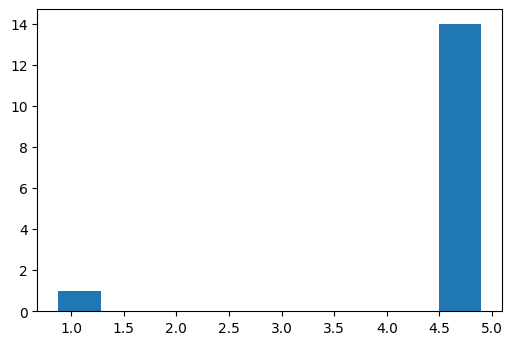

In [4]:
loans_chunks_iter = pd.read_csv("loans_2007.csv", chunksize=3000)
memory_footprints = list()

for chunk in loans_chunks_iter:
    memory_footprints.append(chunk.memory_usage(deep=True).sum() / (1024*1024))

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(memory_footprints)

As we can see from the histogram, all of the chunks have a memory usage with a value under __5 megabytes__. We'll be using, then, chunks of size 3000.


#### 1.1. How many columns have a numeric type? How many have a string type?

As a next step, we'll familiarize ourselves with the columns to see which ones we can optimize. For this, we need to understand the columns types better while using dataframe chunks.

In [5]:
loans_chunks_iter = pd.read_csv("loans_2007.csv", chunksize=3000)
string_columns = list()
numeric_columns = list()

for chunk in loans_chunks_iter:
    string_type_columns = len(chunk.select_dtypes(include=['object']).columns)
    numeric_type_columns = len(chunk.select_dtypes(include=['number']).columns)
    string_columns.append(string_type_columns)
    numeric_columns.append(numeric_type_columns)

print('Nr of string columns by chunk\n{}\nNr of numeric columns by chunk\n{}'.format(string_columns, numeric_columns))

Nr of string columns by chunk
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22]
Nr of numeric columns by chunk
[31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30]


By default there are 31 numeric columns and 21 string columns. However, it seems like one column in particular is being casting in a different datatype in the last 2 chunks. We'll analyze which is the implied column.

In [6]:
default_string_cols = list()
loans_chunks_iter = pd.read_csv('loans_2007.csv', chunksize=3000)

for chunk in loans_chunks_iter:
    chunk_string_cols = chunk.select_dtypes(include=['object']).columns.tolist()
    if len(default_string_cols) > 0:
        if chunk_string_cols != default_string_cols:
            for c in chunk_string_cols:
                if c not in default_string_cols:
                    print('Different string col: ', c)
    else:
        default_string_cols = chunk_string_cols

Different string col:  id
Different string col:  id


In [7]:
loans_chunks_iter = pd.read_csv("loans_2007.csv", chunksize=3000, usecols=['id'])

for chunk in loans_chunks_iter:
    print(chunk.dtypes)

id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    int64
dtype: object
id    object
dtype: object
id    object
dtype: object


We can see that the `id` column is being casted to the datatype `int64` in all of the chunks but the last 2 chunks where is being casted as `object` type. Since the `id` column won't be useful for our analysis, visualization, or predictive modelling, we can safely ignore this column.


#### 1.2. How many unique values are there in each string column? How many of the string columns contain values that are less than 50% unique?

Next, we'll calculate the number of unique values in each string column and which columns contain a number of unique values less than the 50% of the total values of that column.

The reason to do that is to perform a parsing operation to convert these columns to categorical ones to save memory usage.

In [8]:
loans_chunks_iter = pd.read_csv("loans_2007.csv", chunksize=3000)
valid_columns_to_category = list()
cols_names = list()

for chunk in loans_chunks_iter:
    string_columns = chunk.select_dtypes(include=['object'])
    cols = 0
    for c in string_columns:
        nr_unique_values = len(chunk[c].unique())
        nr_total_values = len(chunk[c])
        if nr_unique_values < 0.5 * nr_total_values:
            cols += 1
            if c not in cols_names:
                cols_names.append(c)
    valid_columns_to_category.append(cols)
    
            
print('Valid string cols to category:\n', valid_columns_to_category)
print('Cols names:\n', cols_names)

Valid string cols to category:
 [20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18]
Cols names:
 ['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']


#### 1.3. Which float columns have no missing values and could be candidates for conversion to the integer type?

In [9]:
loans_chunks_iter = pd.read_csv("loans_2007.csv", chunksize=3000)
missing_cols = list()

for chunk in loans_chunks_iter:
    float_columns = chunk.select_dtypes(include=['float'])
    missing_cols.append(float_columns.apply(pd.isnull).sum())
    
combined_missing_cols = pd.concat(missing_cols)
combined_missing_cols.groupby(combined_missing_cols.index).sum().sort_values()

member_id                        3
total_rec_int                    3
total_pymnt_inv                  3
total_pymnt                      3
revol_bal                        3
recoveries                       3
policy_code                      3
out_prncp_inv                    3
out_prncp                        3
total_rec_late_fee               3
loan_amnt                        3
last_pymnt_amnt                  3
total_rec_prncp                  3
funded_amnt_inv                  3
funded_amnt                      3
dti                              3
collection_recovery_fee          3
installment                      3
annual_inc                       7
inq_last_6mths                  32
total_acc                       32
delinq_2yrs                     32
pub_rec                         32
delinq_amnt                     32
open_acc                        32
acc_now_delinq                  32
tax_liens                      108
collections_12_mths_ex_med     148
chargeoff_within_12_

All of the columns have missing values, so we'll get an error if we try to convert them to the integer type.

#### 1.4. Total memory usage across all of the chunks

In [10]:
loans_chunks_iter = pd.read_csv("loans_2007.csv", chunksize=3000)
total_memory = list()

for chunk in loans_chunks_iter:
    total_memory.append(chunk.memory_usage(deep=True).sum() / (1024*1024))

print('Total memory usage for all of the chunks in MB: ', sum(total_memory))

Total memory usage for all of the chunks in MB:  66.21605968475342


### Step 2: Optimizing String Columns

Let's convert all of the columns where the values are less than 50% unique to the category type, and the columns that contain numeric values to the float type, as this will save a lot of memory.

In [11]:
# Possible string columns to numeric types
default_string_cols

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [12]:
# Useful string columns
useful_string_cols = ['term', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']
useful_string_cols

['term',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d']

In [13]:
## Create dictionary (key: column, value: list of Series objects representing each chunk's value counts)
loans_chunks_iter = pd.read_csv('loans_2007.csv', chunksize=3000)
str_cols_vc = dict()

for chunk in loans_chunks_iter:
    str_cols = chunk.select_dtypes(include=['object'])
    for col in str_cols.columns:
        current_col_vc = str_cols[col].value_counts()
        if col in str_cols_vc:
            str_cols_vc[col].append(current_col_vc)
        else:
            str_cols_vc[col] = [current_col_vc]
            
## Combine the value counts
combined_vcs = dict()

for col in str_cols_vc:
    combined_vc = pd.concat(str_cols_vc[col])
    final_vc = combined_vc.groupby(combined_vc.index).sum()
    combined_vcs[col] = final_vc
    
for col in useful_string_cols:
    print(col)
    print(combined_vcs[col])
    print()

term
 36 months    31534
 60 months    11001
Name: term, dtype: int64

sub_grade
A1    1142
A2    1520
A3    1823
A4    2905
A5    2793
B1    1882
B2    2113
B3    2997
B4    2590
B5    2807
C1    2264
C2    2157
C3    1658
C4    1370
C5    1291
D1    1053
D2    1485
D3    1322
D4    1140
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G3      79
G4      99
G5      86
Name: sub_grade, dtype: int64

emp_title
  old palm inc                       1
 Brocade Communications              1
 CenturyLink                         1
 Department of Homeland Security     1
 Down To Earth Distributors, Inc.    1
                                    ..
zashko inc.                          1
zeno office solutions                1
zion lutheran school                 1
zoll medical corp                    1
zozaya officiating                   1
Name: emp_title, Length: 30658, dtype: int64

home_ownership
MOR

From the different `value_counts` of the interesting columns of the chunks, we can infer some valuable insights:
   - The `term` and `revol_util` columns can be easily converted to numerical datatypes just performing a simple data cleaning.
   - The `sub_grade`, `home_ownership`, `verification_status` and `purpose` columns have a few little representation of unique values, so they can be safely converted into categorical values.
   - The `issue_d`, `earliest_cr_line`, `last_pymnt_d` and `last_credit_pull_d` columns can be converted to datetime datatypes.
   - The `emp_title` column remains as a string (object) datatype column.

In [14]:
# Columns to be converted to categorical
convert_col_categorical = {"sub_grade": "category",
                      "home_ownership": "category",
                      "verification_status": "category",
                      "purpose": "category"}

# Columns to be parsed to datetime
convert_col_datetime = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]

# Parsing string columns
loans_chunks_iter = pd.read_csv('loans_2007.csv', chunksize=3000, dtype=convert_col_categorical, parse_dates=convert_col_datetime)
total_memory = list()

for chunk in loans_chunks_iter:
    term_cleaned = chunk['term'].str.lstrip(" ").str.rstrip(" months")
    revol_cleaned = chunk['revol_util'].str.rstrip("%")
    chunk['term'] = pd.to_numeric(term_cleaned, downcast='integer')
    chunk['revol_util'] = pd.to_numeric(revol_cleaned, downcast='float')
    total_memory.append(chunk.memory_usage(deep=True).sum() / (1024*1024))
    
print('Total memory usage for all of the chunks in MB: ', sum(total_memory))

Total memory usage for all of the chunks in MB:  41.639418601989746


Through performing these operations we can see we have reduced the total memory usage from __66.21 MB__ to __41.63 MB__, about __37% less memory consumption__!


### Step 3: Optimizing Numeric Columns

The last step is to try to optimize the numeric columns of the dataframe into a less memory consuming options.

We have previously seen that all the numeric columns contain at least 1 missing value, so performing a conversion to an integer type for any of these columns will cause an error as the NumPy `int` type does not have a missing value object.

With that in mind, we'll try to check if it is possible to convert any of the numeric columns to a subtype that use fewer bytes to represent each value.

In [15]:
# Function to check if conversion is possible. If so, convert it
def change_float_type(df, col_name):
    import numpy as np
    # Get the minimum and maximum values
    col_max = df[col_name].max()
    col_min = df[col_name].min()
    # Find the datatype
    for dtype_name in ['float16', 'float32', 'float64', 'float128']:
        # Check if this datatype can hold all values
        if col_max <  np.finfo(dtype_name).max and col_min > np.finfo(dtype_name).min:
            df[col_name] = df[col_name].astype(dtype_name)
            break

In [16]:
# Parsing numeric columns
loans_chunks_iter = pd.read_csv("loans_2007.csv", chunksize=3000)
total_memory = list()

for chunk in loans_chunks_iter:
    float_columns = chunk.select_dtypes(include=['float'])
    for col in float_columns:
        change_float_type(chunk, col)
    total_memory.append(chunk.memory_usage(deep=True).sum() / (1024*1024))
    
print('Total memory usage for all of the chunks in MB: ', sum(total_memory))

Total memory usage for all of the chunks in MB:  59.15733242034912


In [17]:
# Alternative way
loans_chunks_iter = pd.read_csv("loans_2007.csv", chunksize=3000)
total_memory = list()

for chunk in loans_chunks_iter:
    float_columns = chunk.select_dtypes(include=['float'])
    for col in float_columns:
        chunk[col] = pd.to_numeric(chunk[col], downcast='float')
    total_memory.append(chunk.memory_usage(deep=True).sum() / (1024*1024))
    
print('Total memory usage for all of the chunks in MB: ', sum(total_memory))

Total memory usage for all of the chunks in MB:  61.34797191619873


As we can see, through performing these operations we can see we have reduced the total memory usage from __66.21 MB__ to __59.15 MB__, about __10% less memory consumption__!


### Step 4: Merging optimizations

Finally, we'll evaluate the total memory consumption reduction obtained through the different methods previously indicated.

In [18]:
# Columns to be converted to categorical
convert_col_categorical = {"sub_grade": "category",
                      "home_ownership": "category",
                      "verification_status": "category",
                      "purpose": "category"}

# Columns to be parsed to datetime
convert_col_datetime = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]

# Parsing string columns
loans_chunks_iter = pd.read_csv('loans_2007.csv', chunksize=3000, dtype=convert_col_categorical, parse_dates=convert_col_datetime)
total_memory = list()

for chunk in loans_chunks_iter:
    term_cleaned = chunk['term'].str.lstrip(" ").str.rstrip(" months")
    revol_cleaned = chunk['revol_util'].str.rstrip("%")
    chunk['term'] = pd.to_numeric(term_cleaned, downcast='integer')
    chunk['revol_util'] = pd.to_numeric(revol_cleaned, downcast='float')
    float_columns = chunk.select_dtypes(include=['float'])
    for col in float_columns:
        change_float_type(chunk, col)
    total_memory.append(chunk.memory_usage(deep=True).sum() / (1024*1024))
    
print('Total memory usage for all of the chunks in MB: ', sum(total_memory))

Total memory usage for all of the chunks in MB:  34.56044673919678


The total memory usage has lowered from __66.21 MB__ to __34.56 MB__, which is about __48% reduction__! obtained just by performing some datatype analysis and conversion.